In [1]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [2]:
df = pd.read_csv('NYPD_Arrests_Data__Historic_.csv', usecols=['ARREST_DATE','AGE_GROUP','PERP_SEX','PERP_RACE','LAW_CAT_CD','ARREST_BORO','X_COORD_CD','Y_COORD_CD'])
df = df.dropna()
df.head()

,ARREST_DATE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD
1,01/26/2019,F,M,45-64,M,BLACK,1000555.0,230994.0
2,02/06/2019,F,M,25-44,M,UNKNOWN,986685.0,215375.0
3,01/06/2016,F,K,25-44,M,BLACK,998032.0,175598.0
4,11/15/2018,F,K,25-44,M,BLACK,1003606.0,185050.0
5,09/13/2006,M,K,45-64,M,BLACK,1004580.0,183838.0


In [3]:
print(f"Total of {df.shape[0]} Records")

Total of 5134486 Records


## Cleaning and Format Fields

In [4]:
df[['month','day','year']] = df['ARREST_DATE'].str.split('/',expand=True)
df[['month','day','year']] = df[['month','day','year']].astype('int32')

In [5]:
from sklearn import preprocessing
age_le = preprocessing.LabelEncoder()
gender_le = preprocessing.LabelEncoder()
race_le = preprocessing.LabelEncoder()
law_le = preprocessing.LabelEncoder()
boro_le = preprocessing.LabelEncoder()

age_le.fit(df['AGE_GROUP'].values)
gender_le.fit(df['PERP_SEX'].values)
race_le.fit(df['PERP_RACE'].values)
law_le.fit(df['LAW_CAT_CD'].values)
boro_le.fit(df['ARREST_BORO'].values)

df['age_label'] = age_le.transform(df['AGE_GROUP'].values)
df['gender_label'] = gender_le.transform(df['PERP_SEX'].values)
df['race_label'] = race_le.transform(df['PERP_RACE'].values)
df['law_label'] = law_le.transform(df['LAW_CAT_CD'].values)
df['boro_label'] = boro_le.transform(df['ARREST_BORO'].values)

df.head()


,ARREST_DATE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,month,day,year,age_label,gender_label,race_label,law_label,boro_label
1,01/26/2019,F,M,45-64,M,BLACK,1000555.0,230994.0,1,26,2019,34,1,2,0,2
2,02/06/2019,F,M,25-44,M,UNKNOWN,986685.0,215375.0,2,6,2019,22,1,5,0,2
3,01/06/2016,F,K,25-44,M,BLACK,998032.0,175598.0,1,6,2016,22,1,2,0,1
4,11/15/2018,F,K,25-44,M,BLACK,1003606.0,185050.0,11,15,2018,22,1,2,0,1
5,09/13/2006,M,K,45-64,M,BLACK,1004580.0,183838.0,9,13,2006,34,1,2,2,1


## KMode Clustering

In [8]:
df_test = df[df['year']==2020]
X = df_test[["age_label","gender_label","race_label","law_label","boro_label"]]
print(f"Total of {df_test.shape[0]} Records in 2020")
X.head()

Total of 139024 Records in 2020


,age_label,gender_label,race_label,law_label,boro_label
5012956,22,1,2,0,0
5012957,22,1,2,0,0
5012958,34,1,2,0,0
5012959,22,0,2,0,0
5012960,22,1,2,0,0


### Elbow Method To Find Optimal K
(Following cell takes a long time to run)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 323210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 323210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 323210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 323210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 323210.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 282012.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29710, cost: 277919.0
Init: initializing centroids
Init: initializing clusters
Startin

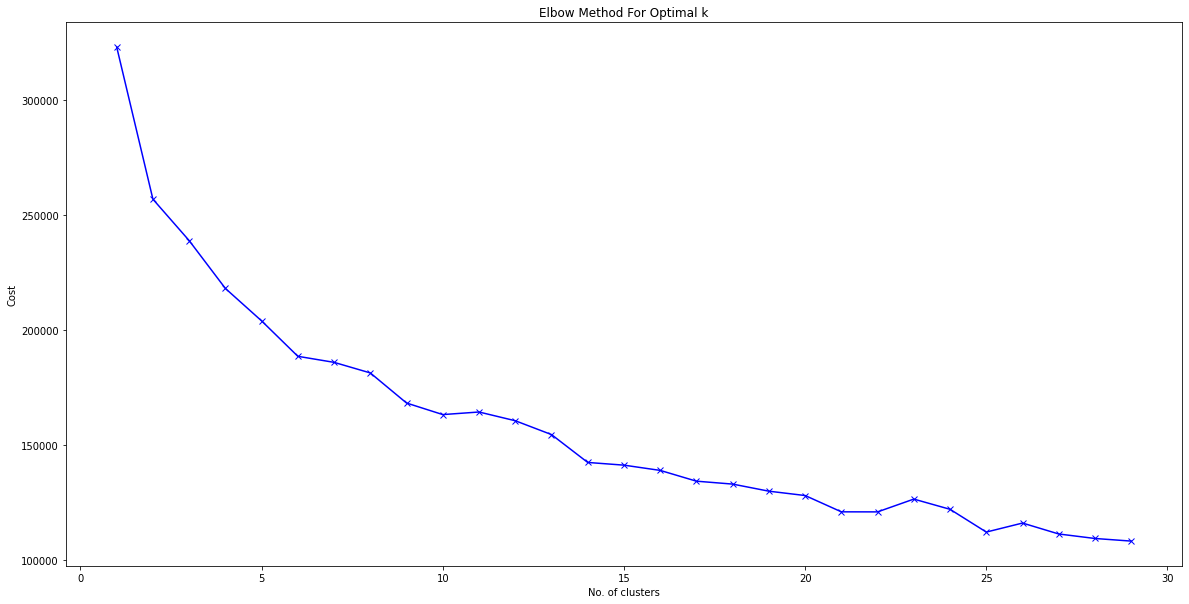

In [14]:
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# 3 is the best K
kmode = KModes(n_clusters= 3, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(X)
df_test['group'] = kmode.predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30970, cost: 250338.0
Run 1, iteration: 2/100, moves: 1167, cost: 250338.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 30307, cost: 235823.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 27378, cost: 235527.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13080, cost: 241021.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1436, cost: 253229.0
Best run was number 3


C:\Users\xulai\AppData\Local\Temp\ipykernel_25064\2198450265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['group'] = kmode.predict(X)


### Visualize groups in other attributes

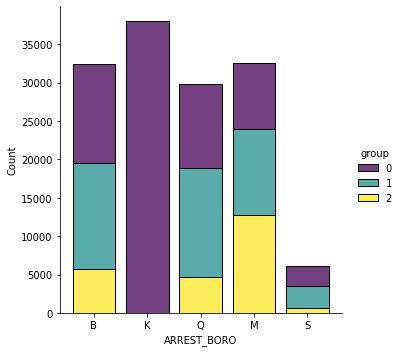

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
sns.displot(data = df_test, x = 'ARREST_BORO', hue= 'group', multiple="stack", palette ='viridis', shrink=.8)

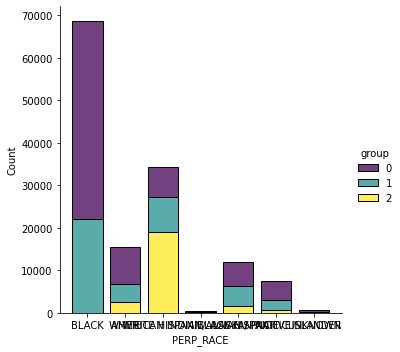

In [13]:
sns.displot(data = df_test, x= "PERP_RACE", hue = "group", multiple="stack", palette ='viridis', shrink=.8)

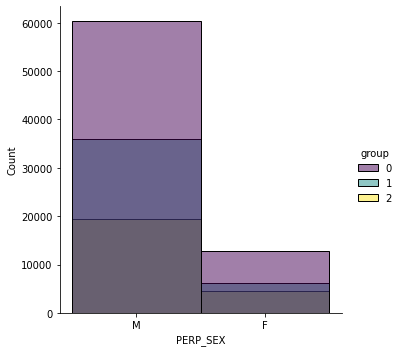

In [14]:
sns.displot(data = df_test, x= "PERP_SEX", hue = "group", palette ='viridis')